# Smart finder of the neighborhood that better suits your desires!

## Table of Contents

# Table of contents
1. [Introduction](#introduction)
2. [Data selection](#dataselection)


## Introduction <a name="introduction"></a>

I recently moved to New York and, while struggling to decide the appropriate neighoborhood where to move to. Several days spent on Google to look for the best suited neighborhood for me and my girlfriend, in such a huge unknown city, was only causing me headache; but the problem with all these lists were they just looked like opinions and not based on data. Coming from a science background, I understood that what I needed were data to support my choice. 
I want to avoid my choice to be a coin toss, therefore my idea is to use available data to support my decision and possibly avoid surprises... 

## Data Selection <a name="dataselection"></a>

In this project we will try to identify neighborhood in New York that are valuabel for the life of a young couple. This project is targeted towards young couples looking for new homes or stakeholders who offer housing to young couples.

Finding a suitable neighbourhood to base your future life is a challenge. Especially, in big cities like London. There are many variables to consider such as crime rates and easy access to venues such as Restaurants, Gyms, Pubs, and Libraries.

To determine which district to select, we will focus on neighborhoods with low crime rates and close to venues that meet young couple expectation, considering the following data

    Crime Rates for each neighbourhood
    Types of venues
    The Amount of personal best suited venues in each neighbourhood

We will extract Crime Rate data for each neighbourhood from NY data.gov where all registered crimes are stored.

Venues data will be obtained by using Foursquare API. 
The total number of venues within that Category will be calculated for each postal code.



In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
import requests
import json
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
import requests

import urllib3
urllib3.disable_warnings()

In [2]:
! pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 8.4 MB/s  eta 0:00:01


In [3]:
import folium

In [4]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_1a4a7592427d42e1b61840053f7aeeea = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_1a4a7592427d42e1b61840053f7aeeea = 'https://s3.eu.cloud-object-storage.appdomain.cloud'

client_1a4a7592427d42e1b61840053f7aeeea = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ie1Gw3nZukjj12oWVjYdcTgnIr5qoV4nFUWAQbbs0O40',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_1a4a7592427d42e1b61840053f7aeeea)

body = client_1a4a7592427d42e1b61840053f7aeeea.get_object(Bucket='anewindianrestaurantintown-donotdelete-pr-lpeffgueaygs4r',Key='NYPD_Complaint_Data_Historic.csv.part')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crime = pd.read_csv(body)
print(crime.shape)
crime.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2297095, 35)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,700381962,05/28/2015,15:00:00,NaN,NaN,46.0,06/01/2015,578,HARRASSMENT 2,638.0,...,M,NaN,40.845868,-73.915888,"(40.84586773, -73.915888033)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
1,642234217,10/28/2013,13:50:00,10/28/2013,13:50:00,120.0,10/28/2013,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,NaN,40.627061,-74.077149,"(40.627060894, -74.077149232)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M
2,242465164,05/09/2012,20:50:00,05/09/2012,21:00:00,24.0,05/09/2012,236,DANGEROUS WEAPONS,782.0,...,NaN,NaN,40.800966,-73.969047,"(40.800965968, -73.969047272)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E
3,927207428,01/03/2014,13:30:00,01/03/2014,13:35:00,108.0,01/03/2014,109,GRAND LARCENY,409.0,...,M,NaN,40.745242,-73.894253,"(40.745241809, -73.894253382)",PATROL BORO QUEENS NORTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,M
4,492142357,04/13/2016,00:00:00,NaN,NaN,40.0,04/13/2016,351,CRIMINAL MISCHIEF & RELATED OF,258.0,...,NaN,NaN,40.810352,-73.924942,"(40.810351863, -73.924942326)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E


The dowloaded data have to be cleaned up from NA values and coloumns that are evaluated not usedul for our purpose.

In [5]:
crime.drop(['CMPLNT_NUM','CRM_ATPT_CPTD_CD','CMPLNT_FR_TM','SUSP_RACE','SUSP_SEX','SUSP_AGE_GROUP','STATION_NAME','HOUSING_PSA','CMPLNT_TO_TM','X_COORD_CD','Y_COORD_CD','HADEVELOPT','PD_CD','KY_CD','CMPLNT_TO_DT','ADDR_PCT_CD','RPT_DT','JURISDICTION_CODE','JURIS_DESC','PREM_TYP_DESC','TRANSIT_DISTRICT','Lat_Lon','PATROL_BORO','JURISDICTION_CODE','PARKS_NM'],axis= 1, inplace= True)
crime.dropna(subset = ["Latitude"], inplace=True)
crime.dropna(subset = ["Longitude"], inplace=True)
crime.dropna(subset = ["CMPLNT_FR_DT"], inplace=True)
crime['Postal_Code'] = ''

In [6]:
crime[['month', 'day', 'year']] = crime['CMPLNT_FR_DT'].str.split('/', expand=True)
crime['year'] = pd.to_numeric(crime['year'])
#crime.sort_values(by="year",inplace=True, ascending=False)
#crime = crime[(crime['year'] > 2018)&(crime['VIC_AGE_GROUP'] = "25-44")&(crime['VIC_RACE'] = "WHITE")]  
crime = crime[(crime.year.isin([2018]))]
crime['CMPLNT_FR_DT'] = pd.to_datetime(crime.CMPLNT_FR_DT)
crime.sort_values(by="CMPLNT_FR_DT",inplace=True, ascending=False)
crime.reset_index(drop=True, inplace=True)

In [7]:
crime.shape

(19665, 15)

Postal code is extracted for every crime location from longitude and latitute data using nominatim function

In [8]:
for i in range(len(crime)):
    print(i,end = "\r")
    geolocator = Nominatim(user_agent='US_Explorer')
    Lat = crime.loc[i,'Latitude']
    Lon = crime.loc[i,'Longitude']
    #save to a tuple for use in geocoder
    p = (Lat, Lon)
    location = geolocator.reverse(p, timeout = 500)
    #if location is None:
        #continue
    raw = location.raw
    #print(raw)
    try:
        post = raw['address']['postcode'].split(' ')
        crime.loc[i,'Postal_Code'] = post[0]
    except KeyError:
        continue

In [9]:
# crime_hist = crime

In [10]:
# from project_lib import Project
# project = Project(project_id='f646a4dd-2dda-41fd-bf25-f5c88b0fb0f9',project_access_token='p-24d23d5abab9de291e76968428f04917a748dedf')
# pc = project.project_context
# project.save_data(data=crime_hist.to_csv(index=False),file_name='crime_hist.csv',overwrite=True)

In [11]:
# body = client_1a4a7592427d42e1b61840053f7aeeea.get_object(Bucket='anewindianrestaurantintown-donotdelete-pr-lpeffgueaygs4r',Key='crime_hist.csv')['Body']
# # add missing __iter__ method, so pandas accepts body as file-like object
# if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# crime = pd.read_csv(body)
# crime.head()

,CMPLNT_FR_DT,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Postal_Code,month,day,year
0,2018-12-31,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF, CRIMINAL 4, OF MOTOR",MISDEMEANOR,BRONX,FRONT OF,40.828334,-73.911917,45-64,BLACK HISPANIC,F,10456,12,31,2018
1,2018-12-31,PETIT LARCENY,"LARCENY,PETIT OF LICENSE PLATE",MISDEMEANOR,BRONX,FRONT OF,40.841990,-73.924495,65+,BLACK,F,10452,12,31,2018
2,2018-12-31,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",MISDEMEANOR,BRONX,REAR OF,40.825417,-73.905432,45-64,BLACK,F,10456,12,31,2018
3,2018-12-31,PETIT LARCENY,"LARCENY,PETIT FROM BUILDING,UN",MISDEMEANOR,BRONX,INSIDE,40.825064,-73.877397,45-64,UNKNOWN,F,10472,12,31,2018
4,2018-12-31,GRAND LARCENY,"LARCENY,GRAND BY BANK ACCT COMPROMISE-REPRODUC...",FELONY,MANHATTAN,INSIDE,40.707118,-74.012229,UNKNOWN,UNKNOWN,D,10003,12,31,2018


In [12]:
crime.dtypes

CMPLNT_FR_DT          object
OFNS_DESC             object
PD_DESC               object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
Latitude             float64
Longitude            float64
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX               object
Postal_Code           object
month                  int64
day                    int64
year                   int64
dtype: object

In [13]:
#Determine the unique postal codes and make sure that it only contains the prefix
crime['PC_Length'] = crime['Postal_Code'].str.len()
crime = crime[crime['PC_Length'] < 6]
crime.reset_index(drop=True, inplace=True)
crime.tail()

,CMPLNT_FR_DT,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Postal_Code,month,day,year,PC_Length
19442,2018-01-01,SEX CRIMES,"SEXUAL ABUSE 3,2",MISDEMEANOR,MANHATTAN,INSIDE,40.716196,-73.997491,<18,BLACK,F,10013,1,1,2018,5.0
19443,2018-01-01,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL MIS 2 & 3,FELONY,QUEENS,INSIDE,40.730041,-73.851655,25-44,WHITE,F,11375,1,1,2018,5.0
19444,2018-01-01,SEX CRIMES,SODOMY 1,FELONY,QUEENS,INSIDE,40.698737,-73.831569,<18,WHITE HISPANIC,F,11418,1,1,2018,5.0
19445,2018-01-01,SEX CRIMES,"SEXUAL ABUSE 3,2",MISDEMEANOR,BRONX,INSIDE,40.810396,-73.925311,<18,BLACK,F,10454,1,1,2018,5.0
19446,2018-01-01,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,BROOKLYN,FRONT OF,40.612279,-73.978841,25-44,WHITE HISPANIC,M,11204,1,1,2018,5.0


In [14]:
crime.rename(columns={'PC_Length': 'Crime_Incid'}, inplace=True)
crime['Crime_Incid'] = 1
crime.head()

,CMPLNT_FR_DT,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Postal_Code,month,day,year,Crime_Incid
0,2018-12-31,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF, CRIMINAL 4, OF MOTOR",MISDEMEANOR,BRONX,FRONT OF,40.828334,-73.911917,45-64,BLACK HISPANIC,F,10456,12,31,2018,1
1,2018-12-31,PETIT LARCENY,"LARCENY,PETIT OF LICENSE PLATE",MISDEMEANOR,BRONX,FRONT OF,40.841990,-73.924495,65+,BLACK,F,10452,12,31,2018,1
2,2018-12-31,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",MISDEMEANOR,BRONX,REAR OF,40.825417,-73.905432,45-64,BLACK,F,10456,12,31,2018,1
3,2018-12-31,PETIT LARCENY,"LARCENY,PETIT FROM BUILDING,UN",MISDEMEANOR,BRONX,INSIDE,40.825064,-73.877397,45-64,UNKNOWN,F,10472,12,31,2018,1
4,2018-12-31,GRAND LARCENY,"LARCENY,GRAND BY BANK ACCT COMPROMISE-REPRODUC...",FELONY,MANHATTAN,INSIDE,40.707118,-74.012229,UNKNOWN,UNKNOWN,D,10003,12,31,2018,1


In [15]:
#Group by Postal Code
crime_grp = crime.groupby(['Postal_Code'],as_index = False).agg({'Latitude': 'mean','Longitude': 'mean', 'Crime_Incid': 'sum'})
crime_grp = crime_grp.iloc[2:]
print(crime_grp.shape)
crime_grp.head(30)

(196, 4)


,Postal_Code,Latitude,Longitude,Crime_Incid
2,10001,40.749337,-73.993705,270
3,10002,40.716374,-73.987790,237
4,10003,40.729133,-73.990600,196
5,10004,40.704105,-74.011240,16
6,10005,40.711986,-74.008325,46
7,10006,40.707493,-74.014126,18
8,10007,40.713886,-74.009370,17
9,10009,40.725298,-73.980384,97
10,10010,40.738955,-73.984590,100
11,10011,40.741178,-73.999861,169


Let's display a map with all the considered neighborhoods.

In [16]:
#Map Data

#obtain latitude and longitude for London
geolocator = Nominatim(user_agent='US_Explorer')
location1 = geolocator.geocode('New York, US')
ny_lat = location1.latitude
ny_lng = location1.longitude

#Create a map for London with all the Postal Codes Plotted
ny_map = folium.Map(location = [ny_lat, ny_lng], zoom_start = 11)
for lat, lng, post, crime in zip(crime_grp['Latitude'], crime_grp['Longitude'], crime_grp['Postal_Code'], crime_grp['Crime_Incid']):
    label = '{}: Crime: {}'.format(post, crime)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([lat, lng], 
                        radius = 5, 
                        popup = label, 
                        color = 'blue', 
                        fill = True, 
                        fill_opacity = 0.5, 
                       parse_html = False).add_to(ny_map)
ny_map

In [17]:
#Determine Distribution of Crime
crime_grp.describe()

,Latitude,Longitude,Crime_Incid
count,196.000000,196.000000,196.000000
mean,40.726571,-73.924110,99.153061
std,0.079711,0.098413,70.309331
min,40.510452,-74.244637,1.000000
25%,40.677178,-73.981920,46.000000
50%,40.727048,-73.938264,91.500000
75%,40.774925,-73.860226,142.000000
max,40.898512,-73.705224,372.000000


Text(0, 0.5, '# of Crime Incidents')

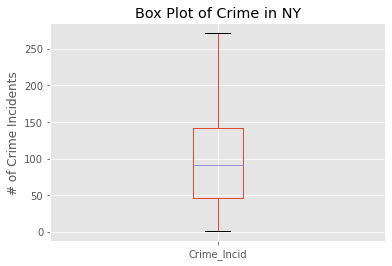

In [18]:
crime_grp['Crime_Incid'].plot(kind = 'box', showfliers=False)
plt.title('Box Plot of Crime in NY')
plt.ylabel('# of Crime Incidents')

### Data Visualization
Let's Map these data. We will assume that anything within the interquartile range is average amount of crime. Anything below is low crime (safe) and anything above is high crime (unsafe).

In [19]:
ny_crime_map = folium.Map(location = [ny_lat, ny_lng], zoom_start = 11)
for lat, lng, post, crime in zip(crime_grp['Latitude'], crime_grp['Longitude'], crime_grp['Postal_Code'], crime_grp['Crime_Incid']):
    label = '{}: Crime: {} incidents'.format(post, crime)
    label = folium.Popup(label, parse_html = True)
    if int(crime) < 46:
        color="green" 
    elif int(crime) >  142:
        color = "red"
    else: 
        color="yellow"
    folium.CircleMarker([lat, lng], 
                        radius = 4, 
                        popup = label, 
                        color = color,
                        fill = True, 
                        fill_opacity = 0.6, 
                        parse_html = False).add_to(ny_crime_map)
ny_crime_map

In [20]:
crime_grp = crime_grp[crime_grp['Crime_Incid']<46]
print(crime_grp.shape)
crime_grp.reset_index(drop=True,inplace=True)
crime_grp.tail()

(48, 4)


,Postal_Code,Latitude,Longitude,Crime_Incid
43,11416,40.683851,-73.851026,22
44,11421,40.692662,-73.858214,37
45,11426,40.732476,-73.722124,17
46,11694,40.577651,-73.842004,28
47,11697,40.557450,-73.911897,2


### Venue search

Lets now find the number of venues in each Postal Code.

In [21]:
# Insert Foursquare credential
CLIENT_ID = '15BVIWVORNZATBPR2UDHW2XHE0DS2B24KARGUWJ5JQDBCJ0X' # your Foursquare ID
CLIENT_SECRET = 'ZWUORIZXBPY4PPZ2QQUPLRYCQQXDSJWVHTS0TEJOIZHJBA35' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
Radius = 300

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 15BVIWVORNZATBPR2UDHW2XHE0DS2B24KARGUWJ5JQDBCJ0X
CLIENT_SECRET:ZWUORIZXBPY4PPZ2QQUPLRYCQQXDSJWVHTS0TEJOIZHJBA35


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=300):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name,end = "\r")
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code', 
                  'Postal Code Latitude', 
                  'Postal Code Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
NY_venues = getNearbyVenues(names=crime_grp['Postal_Code'],
                                   latitudes=crime_grp['Latitude'],
                                 longitudes=crime_grp['Longitude']
                                )

In [24]:
# one hot encoding
NY_onehot = pd.get_dummies(NY_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NY_onehot['Postal Code'] = NY_venues['Postal Code'] 

# move neighborhood column to the first column
fixed_columns = [NY_onehot.columns[-1]] + list(NY_onehot.columns[:-1])
NY_onehot = NY_onehot[fixed_columns]

NY_onehot.head()

NY_grouped = NY_onehot.groupby('Postal Code').mean().reset_index()

NY_grouped.head()

,Postal Code,Accessories Store,Adult Boutique,American Restaurant,Animal Shelter,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,10004,0.017241,0.0,0.017241,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.017241,0.000000,0.017241,0.0
1,10006,0.018519,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.018519,0.000000,0.000000,0.0
2,10007,0.000000,0.0,0.000000,0.0,0.019608,0.0,0.019608,0.0,0.000000,...,0.0,0.019608,0.0,0.000000,0.0,0.0,0.039216,0.019608,0.019608,0.0
3,10020,0.000000,0.0,0.050633,0.0,0.000000,0.0,0.000000,0.0,0.012658,...,0.0,0.000000,0.0,0.012658,0.0,0.0,0.000000,0.000000,0.012658,0.0
4,10044,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0


The venues that are basic for my life and I want to have close to my home are the following

Italian Restaurants (Category Id: '4bf58dd8d48988d110941735')

Gyms (Category Id: '4bf58dd8d48988d175941735')

Nightlife spots (Category Id: '4d4b7105d754a06376d81259')

In [25]:
# Define a function that will count the number of venues in each category
def Get_Number_Of_Venues(ID, category):
    for i in range(len(crime_grp)):
        print(i,end = "\r")
        p_lat =crime_grp.iloc[i,1]
        p_lon =crime_grp.iloc[i,2]
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,p_lat,p_lon,VERSION,ID,Radius,LIMIT) 
        test_results = requests.get(url).json()
        print(test_results)
        test_venue = test_results['response']['venues']
        count = np.shape(test_venue)
        crime_grp.loc[i, category] = count[0]

In [26]:
#Create empty columns for each Venue Type
crime_grp['Italian Restaurants'] = ''
crime_grp['Gyms'] = ''
crime_grp['Nightlife spots'] = ''
crime_grp.dropna(inplace=True)

In [27]:
crime_grp.reset_index(inplace = True,drop = True)
crime_grp.head()

,Postal_Code,Latitude,Longitude,Crime_Incid,Italian Restaurants,Gyms,Nightlife spots
0,10004,40.704105,-74.011240,16,,,
1,10006,40.707493,-74.014126,18,,,
2,10007,40.713886,-74.009370,17,,,
3,10020,40.750509,-73.983464,7,,,
4,10044,40.762014,-73.949367,5,,,


In [28]:
Get_Number_Of_Venues( '4bf58dd8d48988d110941735','Italian Restaurants')
Get_Number_Of_Venues('4bf58dd8d48988d175941735','Gyms')
Get_Number_Of_Venues('4d4b7105d754a06376d81259','Nightlife spots')
crime_grp.head(30)

{'meta': {'code': 200, 'requestId': '6131f2f1cdbbc8145d8e5273'}, 'response': {'venues': [{'id': '4a455daff964a52014a81fe3', 'name': "Adrienne's Pizza Bar", 'location': {'address': '54 Stone St', 'crossStreet': 'Mill Ln', 'lat': 40.704348091685645, 'lng': -74.01022261314714, 'labeledLatLngs': [{'label': 'display', 'lat': 40.704348091685645, 'lng': -74.01022261314714}], 'distance': 89, 'postalCode': '10004', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['54 Stone St (Mill Ln)', 'New York, NY 10004', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '49781819'}, 'referralId': 'v-1630663409', 'hasPerk': False}, {'id': '5dc44f2aa1fbb70008f3a74e', 'name': 'Pizza Etalia', 'location': {'address': '20 Beaver St', 'crossStree

{'meta': {'code': 200, 'requestId': '6131f2f16060e37eb41edc62'}, 'response': {'venues': [{'id': '542b4e59498e6ff85d98370b', 'name': 'Cipriani', 'location': {'address': '25 Broadway', 'lat': 40.70581963688384, 'lng': -74.01373646769203, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70581963688384, 'lng': -74.01373646769203}], 'distance': 189, 'postalCode': '10004', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['25 Broadway', 'New York, NY 10004', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d171941735', 'name': 'Event Space', 'pluralName': 'Event Spaces', 'shortName': 'Event Space', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/eventspace_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663409', 'hasPerk': False}, {'id': '4a82f05df964a52098f91fe3', 'name': 'Grotto Pizzeria & Restaurant', 'location': {'address': '69 New St', 'crossStreet': 'btwn Exchange Pl. & Beaver St.', 'lat': 40.705535

{'meta': {'code': 200, 'requestId': '6131f2f24b234128ea962aa0'}, 'response': {'venues': [{'id': '4ee127ffb6343c6ff7a3e449', 'name': 'Valbella Midtown', 'location': {'address': '11 E 53rd St', 'lat': 40.76030525191007, 'lng': -73.9747944842135, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76030525191007, 'lng': -73.9747944842135}], 'distance': 31, 'postalCode': '10022', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['11 E 53rd St', 'New York, NY 10022', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2085381', 'url': 'https://www.seamless.com/menu/valbella-midtown-11-east-53rd-street-new-york/2085381?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&

{'meta': {'code': 200, 'requestId': '6131f2f2832bde16928ec672'}, 'response': {'venues': [{'id': '607bb0a865ac0563522eb665', 'name': 'Uva Next Door', 'location': {'address': '1484 Second Ave', 'crossStreet': '77th', 'lat': 40.772095, 'lng': -73.955707, 'labeledLatLngs': [{'label': 'display', 'lat': 40.772095, 'lng': -73.955707}], 'distance': 115, 'postalCode': '10075', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1484 Second Ave (77th)', 'New York, NY 10075', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663410', 'hasPerk': False}, {'id': '42699000f964a52049211fe3', 'name': 'Uva', 'location': {'address': '1486 2nd Ave', 'crossStreet': 'btwn 77th & 78th St', 'lat': 40.772118, 'lng': -73.95564,

{'meta': {'code': 200, 'requestId': '6131f2f308dddd464f886182'}, 'response': {'venues': [{'id': '457f1183f964a5204b3f1fe3', 'name': 'Pisticci Ristorante', 'location': {'address': '125 La Salle St', 'crossStreet': 'at Broadway', 'lat': 40.81401515598367, 'lng': -73.9602659078139, 'labeledLatLngs': [{'label': 'display', 'lat': 40.81401515598367, 'lng': -73.9602659078139}, {'label': 'entrance', 'lat': 40.814168, 'lng': -73.960354}], 'distance': 197, 'postalCode': '10027', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['125 La Salle St (at Broadway)', 'New York, NY 10027', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '457686', 'url': 'https://www.seamless.com/menu/pisticci-125-la-salle-st-new-york/4

{'meta': {'code': 200, 'requestId': '6131f2f34a01503c1c21baba'}, 'response': {'venues': [{'id': '4a2172ccf964a520f37c1fe3', 'name': 'Felice 64', 'location': {'address': '1166 1st Ave', 'crossStreet': 'E 64th St', 'lat': 40.762706137157465, 'lng': -73.95973879585064, 'labeledLatLngs': [{'label': 'display', 'lat': 40.762706137157465, 'lng': -73.95973879585064}], 'distance': 113, 'postalCode': '10065', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1166 1st Ave (E 64th St)', 'New York, NY 10065', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d123941735', 'name': 'Wine Bar', 'pluralName': 'Wine Bars', 'shortName': 'Wine Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/winery_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '302678', 'url': 'https://www.seamless.com/menu/felice-64-1166-1st-ave-new-york/302678?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=113

{'meta': {'code': 200, 'requestId': '6131f2f4e9b01c3a7d70e46b'}, 'response': {'venues': [{'id': '4b3c0273f964a520488025e3', 'name': 'Rossinis', 'location': {'address': '108 E 38th St', 'lat': 40.749056388003616, 'lng': -73.97902929114717, 'labeledLatLngs': [{'label': 'display', 'lat': 40.749056388003616, 'lng': -73.97902929114717}], 'distance': 174, 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['108 E 38th St', 'New York, NY 10016', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2438318', 'url': 'https://www.seamless.com/menu/rossinis-108-e-38th-st-new-york/2438318?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_content=243

{'meta': {'code': 200, 'requestId': '6131f2f4292c8d77c28716fe'}, 'response': {'venues': [{'id': '60eda733a7ddae4973db6ee8', 'name': 'Cicci Di Carne', 'location': {'address': '250 Vesey St', 'crossStreet': 'Suite 107B', 'lat': 40.713737, 'lng': -74.01677, 'labeledLatLngs': [{'label': 'display', 'lat': 40.713737, 'lng': -74.01677}], 'distance': 103, 'postalCode': '10281', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['250 Vesey St (Suite 107B)', 'New York, NY 10281', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2769759', 'url': 'https://www.seamless.com/menu/cicci-di-carne-250-vesey-st-new-york/2769759?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&

{'meta': {'code': 200, 'requestId': '6131f2f57650b534835aef5f'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '6131f2f505abb17c1dd7dc7a'}, 'response': {'venues': [{'id': '4ad910d8f964a520b81721e3', 'name': 'Da Noi Restaraunt', 'location': {'address': '4358 Victory Blvd', 'lat': 40.58778029506639, 'lng': -74.19704127424215, 'labeledLatLngs': [{'label': 'display', 'lat': 40.58778029506639, 'lng': -74.19704127424215}, {'label': 'entrance', 'lat': 40.587752, 'lng': -74.197038}], 'distance': 310, 'postalCode': '10314', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4358 Victory Blvd', 'Staten Island, NY 10314', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '560655', 'url': 'ht

{'meta': {'code': 200, 'requestId': '6131f2f7f458b767a40da732'}, 'response': {'venues': [{'id': '59dea9ba03132039339cacd3', 'name': 'Parm', 'location': {'address': '620 Atlantic Ave', 'lat': 40.68281936218295, 'lng': -73.97586938802995, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68281936218295, 'lng': -73.97586938802995}], 'distance': 244, 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['620 Atlantic Ave', 'Brooklyn, NY 11217', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '459271459'}, 'referralId': 'v-1630663415', 'hasPerk': False}, {'id': '51b11dda498e674dbfa4c434', 'name': 'Broccolino', 'location': {'address': '446 Dean St Ste A', 'lat': 40.68216873889289, 'lng':

{'meta': {'code': 200, 'requestId': '6131f2f80b6f2010c909c8e0'}, 'response': {'venues': [{'id': '4beae3ee62c0c9282968e1d4', 'name': 'Dante', 'location': {'lat': 40.725765116666665, 'lng': -73.79877861666667, 'labeledLatLngs': [{'label': 'display', 'lat': 40.725765116666665, 'lng': -73.79877861666667}], 'distance': 166, 'postalCode': '11366', 'cc': 'US', 'city': 'Fresh Meadows', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Fresh Meadows, NY 11366', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663416', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '6131f2f89ea561297230dd46'}, 'response': {'venues': [{'id': '4c50f9ae9d642d7f357fc6dc', 'name': 'Avellino Ristorante & Pizzeria', 'location': {'addr

{'meta': {'code': 200, 'requestId': '6131f2fa66d72270511c6875'}, 'response': {'venues': [{'id': '4b5e8cacf964a520519229e3', 'name': '90 Washington Gym', 'location': {'address': '90 Washington St', 'lat': 40.70835531164328, 'lng': -74.01457253949101, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70835531164328, 'lng': -74.01457253949101}], 'distance': 103, 'postalCode': '10006', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['90 Washington St', 'New York, NY 10006', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663418', 'hasPerk': False}, {'id': '51e6af45498eecb6d76f0275', 'name': 'Planet Fitness', 'location': {'address': '25 Broadway', 'lat': 40.70561741117294, 'lng': -74.01345187050833, 'labeledLatLngs': [{'label': 'displa

{'meta': {'code': 200, 'requestId': '6131f2fabbb7997aef038752'}, 'response': {'venues': [{'id': '4a6e331af964a52031d41fe3', 'name': 'Equinox Tribeca', 'location': {'address': '54 Murray St', 'crossStreet': 'at W Broadway', 'lat': 40.71409860726041, 'lng': -74.0096857179283, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71409860726041, 'lng': -74.0096857179283}], 'distance': 35, 'postalCode': '10007', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['54 Murray St (at W Broadway)', 'New York, NY 10007', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663418', 'hasPerk': False}, {'id': '4b8dbba4f964a5201e0b33e3', 'name': 'Church Street Boxing Gym', 'location': {'address': '25 Park Pl', 'crossStreet': 'btwn Church St. & Broadway', 

{'meta': {'code': 200, 'requestId': '6131f2fa1c1c771654133505'}, 'response': {'venues': [{'id': '58bd47b40393cc593014397b', 'name': 'The Training Lab', 'location': {'lat': 40.75102205520973, 'lng': -73.98470905307101, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75102205520973, 'lng': -73.98470905307101}, {'label': 'entrance', 'lat': 40.750886, 'lng': -73.984688}], 'distance': 119, 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663418', 'hasPerk': False}, {'id': '5a5eb42ec47cf96c2ba924de', 'name': 'NEO U', 'location': {'address': '420 Fifth Ave', 'crossStreet': '37th', 'lat': 40.75055665343042, 'lng': -73.98331388872

{'meta': {'code': 200, 'requestId': '6131f2fbde806106d9d57b9f'}, 'response': {'venues': [{'id': '56941398498e241a25c8af0e', 'name': 'Equinox 53rd Street', 'location': {'address': '10 East 53rd Street', 'crossStreet': 'Madison/5th Ave', 'lat': 40.76004, 'lng': -73.975161, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76004, 'lng': -73.975161}], 'distance': 12, 'postalCode': '10022', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['10 East 53rd Street (Madison/5th Ave)', 'New York, NY 10022', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663419', 'hasPerk': False}, {'id': '4a705a19f964a5204ed71fe3', 'name': 'Equinox Rockefeller Center', 'location': {'address': '45 Rockefeller Plz', 'crossStreet': 'btwn W 50th & 51st St', 'lat'

{'meta': {'code': 200, 'requestId': '6131f2fb5f202f24bb648a52'}, 'response': {'venues': [{'id': '4f0b6e9ce4b0319c4ebfe619', 'name': '140 Riverside  gym', 'location': {'address': '140 Riverside Blvd', 'crossStreet': '66th', 'lat': 40.777169693486975, 'lng': -73.98910184314049, 'labeledLatLngs': [{'label': 'display', 'lat': 40.777169693486975, 'lng': -73.98910184314049}], 'distance': 211, 'postalCode': '10069', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['140 Riverside Blvd (66th)', 'New York, NY 10069', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663419', 'hasPerk': False}, {'id': '4ca230907f84224bfb4eba58', 'name': '220 Riverside Blvd Spa/Gym', 'location': {'address': '220 Riverside Blvd', 'crossStreet': 'W. 70th St', 'lat

{'meta': {'code': 200, 'requestId': '6131f2fb5ddffc5041b49039'}, 'response': {'venues': [{'id': '557ac66b498edbe4d73f0d3f', 'name': 'SPEAR Physical Therapy', 'location': {'address': '57 West 57th Street', 'crossStreet': '6th Ave', 'lat': 40.76438796, 'lng': -73.97680359, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76438796, 'lng': -73.97680359}, {'label': 'entrance', 'lat': 40.7646, 'lng': -73.976781}], 'distance': 272, 'postalCode': '10019', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['57 West 57th Street (6th Ave)', 'New York, NY 10019', 'United States']}, 'categories': [{'id': '5744ccdfe4b0c0459246b4af', 'name': 'Physical Therapist', 'pluralName': 'Physical Therapists', 'shortName': 'Physical Therapist', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '563700137'}, 'referralId': 'v-1630663419', 'hasPerk': False}, {'id': '546

{'meta': {'code': 200, 'requestId': '6131f2fc4a01503c1c21cbdb'}, 'response': {'venues': [{'id': '4a426f82f964a520dca51fe3', 'name': 'Bally Total Fitness', 'location': {'address': '139 W 32nd St', 'crossStreet': 'btwn 6th & 7th Ave.', 'lat': 40.74910397275352, 'lng': -73.9902348600804, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74910397275352, 'lng': -73.9902348600804}, {'label': 'entrance', 'lat': 40.749307, 'lng': -73.990393}], 'distance': 216, 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['139 W 32nd St (btwn 6th & 7th Ave.)', 'New York, NY 10001', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663420', 'hasPerk': False}, {'id': '4db42c625da3a76f4438a

{'meta': {'code': 200, 'requestId': '6131f2fc7650b534835afd34'}, 'response': {'venues': [{'id': '557ac66b498edbe4d73f0d3f', 'name': 'SPEAR Physical Therapy', 'location': {'address': '57 West 57th Street', 'crossStreet': '6th Ave', 'lat': 40.76438796, 'lng': -73.97680359, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76438796, 'lng': -73.97680359}, {'label': 'entrance', 'lat': 40.7646, 'lng': -73.976781}], 'distance': 303, 'postalCode': '10019', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['57 West 57th Street (6th Ave)', 'New York, NY 10019', 'United States']}, 'categories': [{'id': '5744ccdfe4b0c0459246b4af', 'name': 'Physical Therapist', 'pluralName': 'Physical Therapists', 'shortName': 'Physical Therapist', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '563700137'}, 'referralId': 'v-1630663420', 'hasPerk': False}, {'id': '585

{'meta': {'code': 200, 'requestId': '6131f2fd1a2b4e28a7c24b8c'}, 'response': {'venues': [{'id': '4da4258e9935a0933db3d66f', 'name': 'Footbridge to East River Pathway', 'location': {'address': 'E. 78th Street', 'crossStreet': 'East River Drive', 'lat': 40.76958930130034, 'lng': -73.9484703540802, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76958930130034, 'lng': -73.9484703540802}], 'distance': 96, 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['E. 78th Street (East River Drive)', 'New York, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663421', 'hasPerk': False}, {'id': '60216fc5869beb58b136ff2b', 'name': '1 East End Avenue Gym', 'location': {'lat': 40.770759, 'lng': -73.947705, 'labeledLatLngs': [{'label': 'display'

{'meta': {'code': 200, 'requestId': '6131f2fd0b6f2010c909d289'}, 'response': {'venues': [{'id': '49f33157f964a5206c6a1fe3', 'name': 'New York Sports Clubs', 'location': {'address': '3 Park Ave', 'crossStreet': 'at E 34th St', 'lat': 40.7466308, 'lng': -73.9806914, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7466308, 'lng': -73.9806914}], 'distance': 159, 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3 Park Ave (at E 34th St)', 'New York, NY 10016', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663421', 'hasPerk': False}, {'id': '49c943d2f964a5204f581fe3', 'name': 'Equinox Park Avenue', 'location': {'address': '1 Park Ave', 'crossStreet': 'btwn E 32nd & E 33rd St', 'lat': 40.746093, 'lng': -73.9813

{'meta': {'code': 200, 'requestId': '6131f2fd746eb777266333f7'}, 'response': {'venues': [{'id': '5d1528fd7950f700237d38c4', 'name': 'Equinox Hudson Yards', 'location': {'address': '35 Hudson Yards', 'lat': 40.754192, 'lng': -74.002777, 'labeledLatLngs': [{'label': 'display', 'lat': 40.754192, 'lng': -74.002777}], 'distance': 171, 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['35 Hudson Yards', 'New York, NY 10001', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663421', 'hasPerk': False}, {'id': '5d2475044dcbca002faad0fe', 'name': 'SoulCycle Hudson Yards', 'location': {'address': '556 W 33rd St', 'lat': 40.7544598, 'lng': -74.0023304, 'labeledLatLngs': [{'labe

{'meta': {'code': 200, 'requestId': '6131f2fdef141d04529951db'}, 'response': {'venues': [{'id': '4a9da316f964a520c03820e3', 'name': 'Five Points Academy', 'location': {'address': '148 Lafayette St', 'crossStreet': 'at Howard St', 'lat': 40.71956613944412, 'lng': -73.99981894110421, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71956613944412, 'lng': -73.99981894110421}], 'distance': 172, 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['148 Lafayette St (at Howard St)', 'New York, NY 10013', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d101941735', 'name': 'Martial Arts School', 'pluralName': 'Martial Arts Schools', 'shortName': 'Martial Arts', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_martialarts_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '81672335'}, 'referralId': 'v-1630663421', 'hasPerk': False}, {'id': '541468f5498e79de14888e73', 'name': 'UFC NYC - SoHo

{'meta': {'code': 200, 'requestId': '6131f2fe3e1d8507ac465a81'}, 'response': {'venues': [{'id': '541a2341498e51ce1037963a', 'name': 'Equinox Brookfield Place', 'location': {'address': '225 Liberty St', 'crossStreet': 'at West St', 'lat': 40.712704, 'lng': -74.014995, 'labeledLatLngs': [{'label': 'display', 'lat': 40.712704, 'lng': -74.014995}], 'distance': 148, 'postalCode': '10281', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['225 Liberty St (at West St)', 'New York, NY 10281', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663422', 'hasPerk': False}, {'id': '5dce0682aeb64a0008039ae5', 'name': 'Rumble Boxing', 'location': {'address': '142 West St', 'lat': 40.7140108, 'lng': -74.01302969999999, 'labeledLatLngs': [{'label': 'd

{'meta': {'code': 200, 'requestId': '6131f2fe49589d11abba473e'}, 'response': {'venues': [{'id': '5dce0682aeb64a0008039ae5', 'name': 'Rumble Boxing', 'location': {'address': '142 West St', 'lat': 40.7140108, 'lng': -74.01302969999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7140108, 'lng': -74.01302969999999}], 'distance': 28, 'postalCode': '10007', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['142 West St', 'New York, NY 10007', 'United States']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b47', 'name': 'Boxing Gym', 'pluralName': 'Boxing Gyms', 'shortName': 'Boxing Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '569725184'}, 'referralId': 'v-1630663422', 'hasPerk': False}, {'id': '541a2341498e51ce1037963a', 'name': 'Equinox Brookfield Place', 'location': {'address': '225 Liberty St', 'crossStreet': 'at West St', 'lat': 40.712704, 'ln

{'meta': {'code': 200, 'requestId': '6131f2fe4a01503c1c21d09f'}, 'response': {'venues': [{'id': '4ca5d8a4a643b713bacde6a6', 'name': 'Shaolin Kung Fu Temple', 'location': {'address': '925 Post Ave', 'lat': 40.631673, 'lng': -74.131582, 'labeledLatLngs': [{'label': 'display', 'lat': 40.631673, 'lng': -74.131582}, {'label': 'entrance', 'lat': 40.631578, 'lng': -74.131663}], 'distance': 278, 'postalCode': '10302', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['925 Post Ave', 'Staten Island, NY 10302', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d101941735', 'name': 'Martial Arts School', 'pluralName': 'Martial Arts Schools', 'shortName': 'Martial Arts', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_martialarts_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663422', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '6131f2fe1be494500dea0a71'}, 'response': {'ven

{'meta': {'code': 200, 'requestId': '6131f300a1ebd63d6d51b992'}, 'response': {'venues': [{'id': '4dbe7cc85da3ff58ec7aaac3', 'name': 'The 5 Bed For Personal Meditation', 'location': {'address': '7301 10th Ave', 'crossStreet': '73rd street', 'lat': 40.625202, 'lng': -74.012703, 'labeledLatLngs': [{'label': 'display', 'lat': 40.625202, 'lng': -74.012703}], 'distance': 327, 'postalCode': '11228', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['7301 10th Ave (73rd street)', 'Brooklyn, NY 11228', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d102941735', 'name': 'Yoga Studio', 'pluralName': 'Yoga Studios', 'shortName': 'Yoga Studio', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_yogastudio_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663424', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '6131f300645beb491ebe9562'}, 'response': {'venues': []}}
{'meta': {'code': 20

{'meta': {'code': 200, 'requestId': '6131f3022d5a8c42dce9efd2'}, 'response': {'venues': [{'id': '4f3e671fe4b01fd858dee61b', 'name': "Joey's Fitness Club", 'location': {'address': '86-13 97th Ave, Ozone Park, NY 11416', 'lat': 40.683997653999604, 'lng': -73.8542109915901, 'labeledLatLngs': [{'label': 'display', 'lat': 40.683997653999604, 'lng': -73.8542109915901}], 'distance': 269, 'postalCode': '11416', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['86-13 97th Ave, Ozone Park, NY 11416', 'Queens, NY 11416', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663426', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '6131f302de806106d9d58b41'}, 'response': {'venues': [{'id': '4cf445876c29236aaa5a75a2', 'name

{'meta': {'code': 200, 'requestId': '6131f303fe724b027d3a048f'}, 'response': {'venues': [{'id': '51b77ea1454a57610205b352', 'name': 'Clinton Hall', 'location': {'address': '90 Washington St', 'crossStreet': 'at Rector St', 'lat': 40.708219322446745, 'lng': -74.01445976327362, 'labeledLatLngs': [{'label': 'display', 'lat': 40.708219322446745, 'lng': -74.01445976327362}, {'label': 'entrance', 'lat': 40.707971, 'lng': -74.014661}], 'distance': 85, 'postalCode': '10006', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['90 Washington St (at Rector St)', 'New York, NY 10006', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d117941735', 'name': 'Beer Garden', 'pluralName': 'Beer Gardens', 'shortName': 'Beer Garden', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/beergarden_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '321419', 'url': 'https://www.seamless.com/menu/clinton-hall-90-washington-st-new-yor

{'meta': {'code': 200, 'requestId': '6131f3041b121958889695bf'}, 'response': {'venues': [{'id': '4f18e49be4b00ed3534f78a8', 'name': "Woodrow's", 'location': {'address': '43 Murray St', 'crossStreet': 'btw Church & W Broadway', 'lat': 40.71396488512297, 'lng': -74.00927475628421, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71396488512297, 'lng': -74.00927475628421}], 'distance': 11, 'postalCode': '10007', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['43 Murray St (btw Church & W Broadway)', 'New York, NY 10007', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d116941735', 'name': 'Bar', 'pluralName': 'Bars', 'shortName': 'Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2088531', 'url': 'https://www.seamless.com/menu/woodrows-43-murray-street-new-york/2088531?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate

{'meta': {'code': 200, 'requestId': '6131f30408dddd464f888449'}, 'response': {'venues': [{'id': '518c165e498e3e2f401b3ebc', 'name': 'Reichenbach Hall', 'location': {'address': '5 W 37th St', 'crossStreet': 'btwn 5th & 6th Ave', 'lat': 40.75079863458283, 'lng': -73.984015643268, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75079863458283, 'lng': -73.984015643268}], 'distance': 56, 'postalCode': '10018', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['5 W 37th St (btwn 5th & 6th Ave)', 'New York, NY 10018', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d10d941735', 'name': 'German Restaurant', 'pluralName': 'German Restaurants', 'shortName': 'German', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/german_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '73378529'}, 'referralId': 'v-1630663428', 'hasPerk': False}, {'id': '60772a4ad1fac3229a4dd18a', 'name': 'The Westbury', 'location': {'address': '

{'meta': {'code': 200, 'requestId': '6131f3049246db397eab9c39'}, 'response': {'venues': [{'id': '515464aee4b092fc562ed8da', 'name': 'Nerai', 'location': {'address': '55 E 54th St', 'lat': 40.76017859302975, 'lng': -73.9731461399172, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76017859302975, 'lng': -73.9731461399172}], 'distance': 159, 'postalCode': '10022', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['55 E 54th St', 'New York, NY 10022', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d10e941735', 'name': 'Greek Restaurant', 'pluralName': 'Greek Restaurants', 'shortName': 'Greek', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/greek_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2037793', 'url': 'https://www.seamless.com/menu/nerai-55-e-54th-st-new-york/2037793?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_content=2037793', 'provider': {'

{'meta': {'code': 200, 'requestId': '6131f305b8b21778e6471c55'}, 'response': {'venues': [{'id': '4be1fe8b660ec9282567c83b', 'name': 'Sojourn', 'location': {'address': '244 E 79th St', 'crossStreet': '2nd and 79th', 'lat': 40.773367, 'lng': -73.955511, 'labeledLatLngs': [{'label': 'display', 'lat': 40.773367, 'lng': -73.955511}], 'distance': 34, 'postalCode': '10075', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['244 E 79th St (2nd and 79th)', 'New York, NY 10075', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1db931735', 'name': 'Tapas Restaurant', 'pluralName': 'Tapas Restaurants', 'shortName': 'Tapas', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/tapas_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '277828', 'url': 'https://www.seamless.com/menu/sojourn-244-e-79th-st-manhattan/277828?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_content=277

{'meta': {'code': 200, 'requestId': '6131f305de806106d9d59064'}, 'response': {'venues': [{'id': '429cfa80f964a520ad241fe3', 'name': 'Pazza Notte', 'location': {'address': '1375 Avenue of the Americas', 'lat': 40.76339098837448, 'lng': -73.97789979324274, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76339098837448, 'lng': -73.97789979324274}], 'distance': 135, 'postalCode': '10019', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1375 Avenue of the Americas', 'New York, NY 10019', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '205930', 'url': 'https://www.seamless.com/menu/pazza-notte-restaurant--lounge-1375-6th-ave-ave-of-the-americas-new-york/205930?affiliate=1131&utm_source=foursquare-affi

{'meta': {'code': 200, 'requestId': '6131f30505abb17c1dd7fca7'}, 'response': {'venues': [{'id': '5202ca16498ef651c47e90b3', 'name': 'Monarch Rooftop', 'location': {'address': '71 W 35th Street', 'crossStreet': 'Corner of 6th Avenue', 'lat': 40.7503922, 'lng': -73.9868091, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7503922, 'lng': -73.9868091}], 'distance': 112, 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['71 W 35th Street (Corner of 6th Avenue)', 'New York, NY 10001', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d116941735', 'name': 'Bar', 'pluralName': 'Bars', 'shortName': 'Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '329830055'}, 'referralId': 'v-1630663429', 'hasPerk': False}, {'id': '596826322aff31413b0a11f5', 'name': 'Turntable Chicken Jazz', 'location': {'address': '20 W 33rd St', 'crossStreet'

{'meta': {'code': 200, 'requestId': '6131f306a1ebd63d6d51c4d3'}, 'response': {'venues': [{'id': '4c966879533aa093a188d145', 'name': 'Champagne Bar Plaza Hotel', 'location': {'address': '768 5th Ave', 'crossStreet': '58th St', 'lat': 40.76408700128683, 'lng': -73.97390247706315, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76408700128683, 'lng': -73.97390247706315}], 'distance': 57, 'postalCode': '10019', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['768 5th Ave (58th St)', 'New York, NY 10019', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d123941735', 'name': 'Wine Bar', 'pluralName': 'Wine Bars', 'shortName': 'Wine Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/winery_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663430', 'hasPerk': False}, {'id': '4a131d33f964a520bb771fe3', 'name': 'The Oak Room at The Plaza Hotel', 'location': {'address': '10 Central Park S', 'crossStreet': 'at 

{'meta': {'code': 200, 'requestId': '6131f3064b234128ea965392'}, 'response': {'venues': [{'id': '565ade1c498e51f6e3954bd2', 'name': 'Treadwell Park', 'location': {'address': '1125 1st Ave', 'crossStreet': 'E 62nd Street', 'lat': 40.76146112347086, 'lng': -73.96076080803624, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76146112347086, 'lng': -73.96076080803624}], 'distance': 50, 'postalCode': '10065', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1125 1st Ave (E 62nd Street)', 'New York, NY 10065', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d117941735', 'name': 'Beer Garden', 'pluralName': 'Beer Gardens', 'shortName': 'Beer Garden', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/beergarden_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '342612', 'url': 'https://www.seamless.com/menu/treadwell-park-1125-first-ave-new-york/342612?affiliate=1131&utm_source=foursquare-affiliate-network&ut

{'meta': {'code': 200, 'requestId': '6131f30666d72270511c824b'}, 'response': {'venues': [{'id': '54cacbff498ec48ec86807f1', 'name': 'The Ainsworth', 'location': {'address': '45 E 33rd St', 'crossStreet': 'btwn Park & Madison Ave', 'lat': 40.74686, 'lng': -73.9823, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74686, 'lng': -73.9823}], 'distance': 194, 'postalCode': '10016', 'cc': 'US', 'neighborhood': 'Midtown Manhattan, New York, NY', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['45 E 33rd St (btwn Park & Madison Ave)', 'New York, NY 10016', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d14e941735', 'name': 'American Restaurant', 'pluralName': 'American Restaurants', 'shortName': 'American', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2200672', 'url': 'https://www.seamless.com/menu/the-ainsworth-midtown-45-e-33rd-st-new-york/2200672?affiliate=11

{'meta': {'code': 200, 'requestId': '6131f307ef141d045299648e'}, 'response': {'venues': [{'id': '5c76e9b6cad1b60039c6dc6f', 'name': 'queensyard', 'location': {'address': '20 Hudson Yards', 'lat': 40.7533818, 'lng': -74.0015597, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7533818, 'lng': -74.0015597}], 'distance': 292, 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['20 Hudson Yards', 'New York, NY 10001', 'United States']}, 'categories': [{'id': '52e81612bcbc57f1066b7a05', 'name': 'English Restaurant', 'pluralName': 'English Restaurants', 'shortName': 'English', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2418930', 'url': 'https://www.seamless.com/menu/queensyard-20-hudson-yards-new-york/2418930?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_content=2418930', 'provider': {

{'meta': {'code': 200, 'requestId': '6131f3079246db397eaba1ce'}, 'response': {'venues': [{'id': '5f5e1b49af65ef27d803a4f0', 'name': 'The Tyger', 'location': {'address': '1 Howard St', 'crossStreet': 'Centre St', 'lat': 40.718835, 'lng': -73.99948, 'labeledLatLngs': [{'label': 'display', 'lat': 40.718835, 'lng': -73.99948}], 'distance': 129, 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1 Howard St (Centre St)', 'New York, NY 10013', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d142941735', 'name': 'Asian Restaurant', 'pluralName': 'Asian Restaurants', 'shortName': 'Asian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663431', 'hasPerk': False}, {'id': '5e4ef0a8b8ff1a00082b7ffe', 'name': 'Live Axe', 'location': {'address': '96 Lafayette St', 'lat': 40.717857360839844, 'lng': -74.0013656616211, 'labeledLatLngs': [{'lab

{'meta': {'code': 200, 'requestId': '6131f307292c8d77c2873cd4'}, 'response': {'venues': [{'id': '4ba414ddf964a520717f38e3', 'name': 'Inatteso Pizzabar Casano', 'location': {'address': '28 West St', 'crossStreet': 'Battery Park City', 'lat': 40.705885649752844, 'lng': -74.01666051631875, 'labeledLatLngs': [{'label': 'display', 'lat': 40.705885649752844, 'lng': -74.01666051631875}], 'distance': 164, 'postalCode': '10004', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['28 West St (Battery Park City)', 'New York, NY 10004', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '294684', 'url': 'https://www.seamless.com/menu/inatteso-pizza-bar-28-west-st-new-york/294684?affiliate=1131&utm_source=foursquare-affiliate-network&u

{'meta': {'code': 200, 'requestId': '6131f3071b12195888969d87'}, 'response': {'venues': [{'id': '4a01ee7bf964a52010711fe3', 'name': "P.J. Clarke's", 'location': {'address': '250 Vesey St', 'crossStreet': '4 World Financial Center', 'lat': 40.71335815035693, 'lng': -74.01626088575756, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71335815035693, 'lng': -74.01626088575756}, {'label': 'entrance', 'lat': 40.714422, 'lng': -74.015781}], 'distance': 88, 'postalCode': '10281', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['250 Vesey St (4 World Financial Center)', 'New York, NY 10281', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d16c941735', 'name': 'Burger Joint', 'pluralName': 'Burger Joints', 'shortName': 'Burgers', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '64790', 'url': 'https://www.seamless.com/menu/pj-clarkes-express-250-vesey-st-ne

{'meta': {'code': 200, 'requestId': '6131f3086060e37eb41f0958'}, 'response': {'venues': [{'id': '555b7016498ef57fbcc739d2', 'name': 'Gunbae', 'location': {'address': '67 Murray St', 'crossStreet': 'West Broadway', 'lat': 40.714529061647745, 'lng': -74.01024165602449, 'labeledLatLngs': [{'label': 'display', 'lat': 40.714529061647745, 'lng': -74.01024165602449}, {'label': 'entrance', 'lat': 40.714573, 'lng': -74.010314}], 'distance': 214, 'postalCode': '10007', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['67 Murray St (West Broadway)', 'New York, NY 10007', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '325347', 'url': 'https://www.seamless.com/menu/gunbae-tribeca-67-murray-st-new-york/325347?affili

{'meta': {'code': 200, 'requestId': '6131f30877a68a46ccc09d30'}, 'response': {'venues': [{'id': '4bdf8c48ffdec928b787eca1', 'name': "Dina's Hideaway", 'location': {'lat': 40.51104524930745, 'lng': -74.24042642339029, 'labeledLatLngs': [{'label': 'display', 'lat': 40.51104524930745, 'lng': -74.24042642339029}], 'distance': 362, 'postalCode': '10307', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Staten Island, NY 10307', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d121941735', 'name': 'Lounge', 'pluralName': 'Lounges', 'shortName': 'Lounge', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663432', 'hasPerk': False}, {'id': '4f89f0c3e4b01f95a369a678', 'name': 'dagastino resorts & casino', 'location': {'lat': 40.50974031514261, 'lng': -74.24817485782887, 'labeledLatLngs': [{'label': 'display', 'lat': 40.50974031514261, 'lng': -74.24

{'meta': {'code': 200, 'requestId': '6131f3093b896f2cb689ae4e'}, 'response': {'venues': [{'id': '4f668bd6e4b041039f9f141b', 'name': 'Majlis Hookah Lounge & Cafe', 'location': {'address': '24805 Union Tpke', 'lat': 40.742635675351494, 'lng': -73.72195590556004, 'labeledLatLngs': [{'label': 'display', 'lat': 40.742635675351494, 'lng': -73.72195590556004}], 'distance': 199, 'postalCode': '11426', 'cc': 'US', 'city': 'Bellerose', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['24805 Union Tpke', 'Bellerose, NY 11426', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d119941735', 'name': 'Hookah Bar', 'pluralName': 'Hookah Bars', 'shortName': 'Hookah Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/hookahbar_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '347784', 'url': 'https://www.seamless.com/menu/majlis-restaurant-248-5-union-tpke-bellerose/347784?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&u

{'meta': {'code': 200, 'requestId': '6131f30af458b767a40dce12'}, 'response': {'venues': [{'id': '49ce7cb3f964a520495a1fe3', 'name': 'Buffalo Wild Wings', 'location': {'address': '139 Flatbush Ave', 'crossStreet': 'at Hanson Pl', 'lat': 40.68476705068683, 'lng': -73.97759646177292, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68476705068683, 'lng': -73.97759646177292}], 'distance': 34, 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['139 Flatbush Ave (at Hanson Pl)', 'Brooklyn, NY 11217', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d14c941735', 'name': 'Wings Joint', 'pluralName': 'Wings Joints', 'shortName': 'Wings', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/wings_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '336058', 'url': 'https://www.seamless.com/menu/buffalo-wild-wings-139-flatbush-ave-brooklyn/336058?affiliate=1131&utm_source=foursquare-affiliate-network&ut

{'meta': {'code': 200, 'requestId': '6131f30af458b767a40dceea'}, 'response': {'venues': [{'id': '4c259afea852c9281a49e56c', 'name': 'Amnesia', 'location': {'address': '100th st and 4th avenue', 'lat': 40.6125817529837, 'lng': -74.03381079313424, 'labeledLatLngs': [{'label': 'display', 'lat': 40.6125817529837, 'lng': -74.03381079313424}], 'distance': 298, 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['100th st and 4th avenue', 'Brooklyn, NY 11209', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d121941735', 'name': 'Lounge', 'pluralName': 'Lounges', 'shortName': 'Lounge', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663434', 'hasPerk': False}, {'id': '517d7b1de4b0069398a5405e', 'name': 'Capri Nite Club', 'location': {'lat': 40.614314, 'lng': -74.031896, 'labeledLatLngs': [{'label': 'display', 'lat': 40.614314, 'ln

{'meta': {'code': 200, 'requestId': '6131f30b6463cd07049391fa'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '6131f30b673c7f36d6a92c02'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '6131f30b940b5927dde4965b'}, 'response': {'venues': [{'id': '4f95fc56e4b0e09d5b9bf3b1', 'name': 'Donovall Hall - Room 113', 'location': {'lat': 40.724979062217166, 'lng': -73.80067946094482, 'labeledLatLngs': [{'label': 'display', 'lat': 40.724979062217166, 'lng': -73.80067946094482}], 'distance': 336, 'postalCode': '11366', 'cc': 'US', 'city': 'Fresh Meadows', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Fresh Meadows, NY 11366', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11d941735', 'name': 'Sports Bar', 'pluralName': 'Sports Bars', 'shortName': 'Sports Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/sportsbar_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663435', 'hasPerk': False}], 'confi

{'meta': {'code': 200, 'requestId': '6131f30cf458b767a40dd263'}, 'response': {'venues': [{'id': '4f32bfe219836c91c7f65c95', 'name': "Andy's Tavern", 'location': {'address': '8501 Rockaway Blvd', 'lat': 40.683494567871094, 'lng': -73.85509490966797, 'labeledLatLngs': [{'label': 'display', 'lat': 40.683494567871094, 'lng': -73.85509490966797}], 'distance': 345, 'postalCode': '11416', 'cc': 'US', 'city': 'Jamaica', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8501 Rockaway Blvd', 'Jamaica, NY 11416', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d116941735', 'name': 'Bar', 'pluralName': 'Bars', 'shortName': 'Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1630663436', 'hasPerk': False}, {'id': '4cafd6d175ebb60c2dd6bfad', 'name': 'Mauro Lounge', 'location': {'lat': 40.68232, 'lng': -73.85255455970764, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68232, 'lng': -73.8525

,Postal_Code,Latitude,Longitude,Crime_Incid,Italian Restaurants,Gyms,Nightlife spots
0,10004,40.704105,-74.011240,16,16,46,48
1,10006,40.707493,-74.014126,18,3,48,47
2,10007,40.713886,-74.009370,17,3,44,43
3,10020,40.750509,-73.983464,7,4,49,49
4,10044,40.762014,-73.949367,5,0,5,0
5,10055,40.760087,-73.975030,1,12,35,48
6,10069,40.777883,-73.986782,13,2,27,9
7,10075,40.773093,-73.955314,33,17,33,45
8,10105,40.762891,-73.979363,5,17,45,50
9,10115,40.812476,-73.961441,6,2,8,12


In [29]:
crime_grp.dropna(inplace=True)
crime_grp.head()

,Postal_Code,Latitude,Longitude,Crime_Incid,Italian Restaurants,Gyms,Nightlife spots
0,10004,40.704105,-74.011240,16,16,46,48
1,10006,40.707493,-74.014126,18,3,48,47
2,10007,40.713886,-74.009370,17,3,44,43
3,10020,40.750509,-73.983464,7,4,49,49
4,10044,40.762014,-73.949367,5,0,5,0


In [30]:
crime_grp['Gyms']= crime_grp['Gyms'].astype('int')
crime_grp['Italian Restaurants']= crime_grp['Italian Restaurants'].astype('int')
crime_grp['Nightlife spots']= crime_grp['Nightlife spots'].astype('int')

crime_grp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Postal_Code          48 non-null     object 
 1   Latitude             48 non-null     float64
 2   Longitude            48 non-null     float64
 3   Crime_Incid          48 non-null     int64  
 4   Italian Restaurants  48 non-null     int64  
 5   Gyms                 48 non-null     int64  
 6   Nightlife spots      48 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 3.0+ KB


In [31]:
crime_grp.head()

,Postal_Code,Latitude,Longitude,Crime_Incid,Italian Restaurants,Gyms,Nightlife spots
0,10004,40.704105,-74.011240,16,16,46,48
1,10006,40.707493,-74.014126,18,3,48,47
2,10007,40.713886,-74.009370,17,3,44,43
3,10020,40.750509,-73.983464,7,4,49,49
4,10044,40.762014,-73.949367,5,0,5,0


In [32]:
ldn_cluster = crime_grp.iloc[:,4:]
print(crime_grp.shape)
print(ldn_cluster.shape)
ldn_cluster.head()

(48, 7)
(48, 3)


,Italian Restaurants,Gyms,Nightlife spots
0,16,46,48
1,3,48,47
2,3,44,43
3,4,49,49
4,0,5,0


## Clustering <a name="clustering"></a>

In [33]:
cluster_num = 3
ldn_kmeans = KMeans(n_clusters = cluster_num, random_state = 0).fit(ldn_cluster)
crime_grp.insert(0,'Cluster_Labels', ldn_kmeans.labels_)

In [34]:
crime_grp.head()

,Cluster_Labels,Postal_Code,Latitude,Longitude,Crime_Incid,Italian Restaurants,Gyms,Nightlife spots
0,1,10004,40.704105,-74.011240,16,16,46,48
1,1,10006,40.707493,-74.014126,18,3,48,47
2,1,10007,40.713886,-74.009370,17,3,44,43
3,1,10020,40.750509,-73.983464,7,4,49,49
4,0,10044,40.762014,-73.949367,5,0,5,0


In [35]:
cluster_map = folium.Map(location = [ny_lat, ny_lng], zoom_start = 10)
for lat, lng, post, crime, cluster in zip(crime_grp['Latitude'], crime_grp['Longitude'], crime_grp['Postal_Code'], crime_grp['Crime_Incid'], crime_grp['Cluster_Labels']):
    label = 'Cluster #: {} Postal Code: {} Crime: {} incidents'.format(cluster,post, crime)
    label = folium.Popup(label, parse_html = True)
    if cluster == 0:
        color="green" 
    elif cluster == 1:
        color = "red"
    else: 
        color="yellow"
    folium.CircleMarker([lat, lng], 
                        radius = 4, 
                        popup = label, 
                        color = "blue",
                        fill = True, 
                        fill_opacity = 0.6, 
                        parse_html = False).add_to(cluster_map)
cluster_map


We Originally selected three clusters.
But lets check if this is the optimal number of clusters

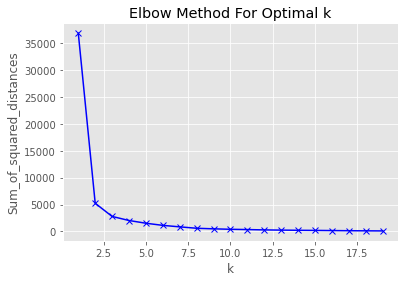

In [36]:
elbow = []
for k in range(1,20):
    km = KMeans(n_clusters = k, random_state = 0).fit(ldn_cluster)
    elbow.append(km.inertia_)


K = range(1,20)
#plt.figure(figsize =(20,10))
plt.plot(K,  elbow,'bx-')
plt.xlabel('k')  
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [37]:
len(crime_grp)


48

In [38]:
crime_grp.head(48)

,Cluster_Labels,Postal_Code,Latitude,Longitude,Crime_Incid,Italian Restaurants,Gyms,Nightlife spots
0,1,10004,40.704105,-74.011240,16,16,46,48
1,1,10006,40.707493,-74.014126,18,3,48,47
2,1,10007,40.713886,-74.009370,17,3,44,43
3,1,10020,40.750509,-73.983464,7,4,49,49
4,0,10044,40.762014,-73.949367,5,0,5,0
5,1,10055,40.760087,-73.975030,1,12,35,48
6,2,10069,40.777883,-73.986782,13,2,27,9
7,1,10075,40.773093,-73.955314,33,17,33,45
8,1,10105,40.762891,-73.979363,5,17,45,50
9,0,10115,40.812476,-73.961441,6,2,8,12


Let's eliminate cluster 0, where the venues are very low

In [39]:
MyLoc = crime_grp[crime_grp['Cluster_Labels']==1]

In [40]:
len(MyLoc)

13

In [41]:
cluster_map = folium.Map(location = [ny_lat, ny_lng], zoom_start = 10)
for lat, lng, post, crime, cluster in zip(MyLoc['Latitude'], MyLoc['Longitude'], MyLoc['Postal_Code'], MyLoc['Crime_Incid'], MyLoc['Cluster_Labels']):
    label = 'Cluster #: {} Postal Code: {} Crime: {} incidents'.format(cluster,post, crime)
    label = folium.Popup(label, parse_html = True)
    if cluster == 0:
        color="green" 
    elif cluster == 1:
        color = "red"
    else: 
        color="yellow"
    folium.CircleMarker([lat, lng], 
                        radius = 4, 
                        popup = label, 
                        color = "blue",
                        fill = True, 
                        fill_opacity = 0.6, 
                        parse_html = False).add_to(cluster_map)
cluster_map


In [44]:
#obtain latitude and longitude for London
geolocator = Nominatim(user_agent='US_Explorer')
location1 = geolocator.geocode('New York, US')
ny_lat = location1.latitude
ny_lng = location1.longitude

#Create a map for London with all the Postal Codes Plotted
ny_map = folium.Map(location = [ny_lat, ny_lng], zoom_start = 11)
ny_map

In [50]:
MyLoc.head()

,Cluster_Labels,Postal_Code,Latitude,Longitude,Crime_Incid,Italian Restaurants,Gyms,Nightlife spots
0,1,10004,40.704105,-74.011240,16,16,46,48
1,1,10006,40.707493,-74.014126,18,3,48,47
2,1,10007,40.713886,-74.009370,17,3,44,43
3,1,10020,40.750509,-73.983464,7,4,49,49
5,1,10055,40.760087,-73.975030,1,12,35,48


In [52]:


MyHouse = MyLoc[MyLoc['Postal_Code']=='10004']
MyHouse_map = folium.Map(location = [ny_lat, ny_lng], zoom_start = 10)
for lat, lng, post, crime, cluster in zip(MyHouse['Latitude'], MyHouse['Longitude'], MyHouse['Postal_Code'], MyHouse['Crime_Incid'], MyHouse['Cluster_Labels']):
    label = 'Cluster #: {} Postal Code: {} Crime: {} incidents'.format(cluster,post, crime)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([lat, lng], 
                        radius = 10, 
                        popup = label, 
                        color = "green",
                        fill = True, 
                        fill_opacity = 0.6, 
                        parse_html = False).add_to(MyHouse_map)
    
MyHouse_map